# DATA606 - Capstone Project
## Proposal Title: Property price prediction
### Author Name - Balaji Manoj Jollu
### Prepared for UMBC Data Science Master Degree Capstone by Dr Chaojie (Jay) Wang

dataset : https://www.kaggle.com/code/goyaladi/property-price-ann-predictions/input

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
file_path = '/content/Makaan_Properties_Buy.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')
df.head()

,Property_Name,Property_id,Property_type,Property_status,Price_per_unit_area,Posted_On,Project_URL,builder_id,Builder_name,Property_building_status,...,is_furnished,listing_domain_score,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_commercial_Listing,is_PentaHouse,is_studio,Listing_Category
0,Arkiton Luxe,15446514,Apartment,Under Construction,"4,285",1 day ago,https://www.makaan.com/ahmedabad/arkiton-life-...,100563465.0,Arkiton life Space,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell
1,Keshav Akshar Ocean Pearl,15367414,Apartment,Under Construction,"7,000",2 days ago,https://www.makaan.com/ahmedabad/keshav-naraya...,100009433.0,Keshav Narayan Group,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell
2,Vishwa Opulence,14683118,Apartment,Ready to move,"5,752",2 days ago,https://www.makaan.com/ahmedabad/vishwa-develo...,100207731.0,Vishwa Developers Ahmedabad,ACTIVE,...,Unfurnished,4.0,False,False,True,True,False,False,False,sell
3,Satyam Sarjan,5476295,Apartment,Ready to move,"2,486",5 days ago,https://www.makaan.com/ahmedabad/satyam-develo...,101303.0,Satyam Developers,ACTIVE,...,Unfurnished,4.0,False,False,True,True,False,False,False,sell
4,Navkar Sunflower,15477040,Apartment,Under Construction,"5,324",8 days ago,https://www.makaan.com/ahmedabad/navkar-buildc...,1484209.0,Navkar Buildcon Ahmedabad,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell


## Exploring dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332096 entries, 0 to 332095
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Property_Name             217826 non-null  object 
 1   Property_id               332096 non-null  int64  
 2   Property_type             332096 non-null  object 
 3   Property_status           271654 non-null  object 
 4   Price_per_unit_area       332096 non-null  object 
 5   Posted_On                 332096 non-null  object 
 6   Project_URL               332096 non-null  object 
 7   builder_id                149978 non-null  float64
 8   Builder_name              149978 non-null  object 
 9   Property_building_status  332096 non-null  object 
 10  City_id                   332096 non-null  int64  
 11  City_name                 332096 non-null  object 
 12  No_of_BHK                 332096 non-null  object 
 13  Locality_ID               332096 non-null  i

In [4]:
df.shape

(332096, 32)

In [5]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Property_Name               114270
Property_id                      0
Property_type                    0
Property_status              60442
Price_per_unit_area              0
Posted_On                        0
Project_URL                      0
builder_id                  182118
Builder_name                182118
Property_building_status         0
City_id                          0
City_name                        0
No_of_BHK                        0
Locality_ID                      0
Locality_Name                    2
Longitude                        0
Latitude                         0
Price                            0
Size                             0
Sub_urban_ID                     0
Sub_urban_name                   0
description                      1
is_furnished                     0
listing_domain_score             0
is_plot                          0
is_RERA_registered               0
is_Apartment                     0
is_ready_to_move                 0
is_

In [6]:
df.dtypes

Property_Name                object
Property_id                   int64
Property_type                object
Property_status              object
Price_per_unit_area          object
Posted_On                    object
Project_URL                  object
builder_id                  float64
Builder_name                 object
Property_building_status     object
City_id                       int64
City_name                    object
No_of_BHK                    object
Locality_ID                   int64
Locality_Name                object
Longitude                   float64
Latitude                    float64
Price                        object
Size                         object
Sub_urban_ID                  int64
Sub_urban_name               object
description                  object
is_furnished                 object
listing_domain_score        float64
is_plot                        bool
is_RERA_registered             bool
is_Apartment                   bool
is_ready_to_move            

## Data Cleaning

In [7]:
df.dropna(inplace=True)

In [8]:
print(df.isnull().sum())

Property_Name               0
Property_id                 0
Property_type               0
Property_status             0
Price_per_unit_area         0
Posted_On                   0
Project_URL                 0
builder_id                  0
Builder_name                0
Property_building_status    0
City_id                     0
City_name                   0
No_of_BHK                   0
Locality_ID                 0
Locality_Name               0
Longitude                   0
Latitude                    0
Price                       0
Size                        0
Sub_urban_ID                0
Sub_urban_name              0
description                 0
is_furnished                0
listing_domain_score        0
is_plot                     0
is_RERA_registered          0
is_Apartment                0
is_ready_to_move            0
is_commercial_Listing       0
is_PentaHouse               0
is_studio                   0
Listing_Category            0
dtype: int64


In [9]:
df.shape

(143708, 32)

In [10]:
df['Price_per_unit_area'] = df['Price_per_unit_area'].str.replace(',', '', regex=True).astype(float)

In [11]:
df['Price'] = df['Price'].str.replace(',', '', regex=True).astype(float)

In [12]:
df['Size'] = df['Size'].str.replace(' sq ft', '').str.replace(',', '').astype(int)

In [13]:
print(df.columns.tolist())

['Property_Name', 'Property_id', 'Property_type', 'Property_status', 'Price_per_unit_area', 'Posted_On', 'Project_URL', 'builder_id', 'Builder_name', 'Property_building_status', 'City_id', 'City_name', 'No_of_BHK', 'Locality_ID', 'Locality_Name', 'Longitude', 'Latitude', 'Price', 'Size', 'Sub_urban_ID', 'Sub_urban_name', 'description', 'is_furnished', 'listing_domain_score', 'is_plot', 'is_RERA_registered', 'is_Apartment', 'is_ready_to_move', 'is_commercial_Listing', 'is_PentaHouse', 'is_studio', 'Listing_Category']


In [14]:
df.head()

,Property_Name,Property_id,Property_type,Property_status,Price_per_unit_area,Posted_On,Project_URL,builder_id,Builder_name,Property_building_status,...,is_furnished,listing_domain_score,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_commercial_Listing,is_PentaHouse,is_studio,Listing_Category
0,Arkiton Luxe,15446514,Apartment,Under Construction,4285.0,1 day ago,https://www.makaan.com/ahmedabad/arkiton-life-...,100563465.0,Arkiton life Space,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell
1,Keshav Akshar Ocean Pearl,15367414,Apartment,Under Construction,7000.0,2 days ago,https://www.makaan.com/ahmedabad/keshav-naraya...,100009433.0,Keshav Narayan Group,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell
2,Vishwa Opulence,14683118,Apartment,Ready to move,5752.0,2 days ago,https://www.makaan.com/ahmedabad/vishwa-develo...,100207731.0,Vishwa Developers Ahmedabad,ACTIVE,...,Unfurnished,4.0,False,False,True,True,False,False,False,sell
3,Satyam Sarjan,5476295,Apartment,Ready to move,2486.0,5 days ago,https://www.makaan.com/ahmedabad/satyam-develo...,101303.0,Satyam Developers,ACTIVE,...,Unfurnished,4.0,False,False,True,True,False,False,False,sell
4,Navkar Sunflower,15477040,Apartment,Under Construction,5324.0,8 days ago,https://www.makaan.com/ahmedabad/navkar-buildc...,1484209.0,Navkar Buildcon Ahmedabad,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell


In [15]:
columns_to_drop = ['Property_Name','Property_id','Posted_On','Project_URL','description','Listing_Category','is_commercial_Listing']
df = df.drop(columns=columns_to_drop)

## Visualizing
the dependency of each column on the "price" column

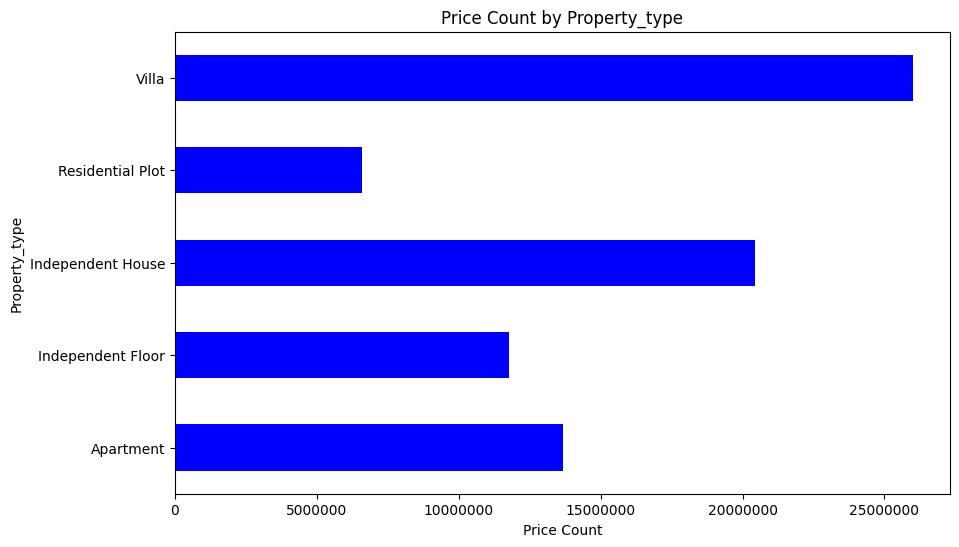

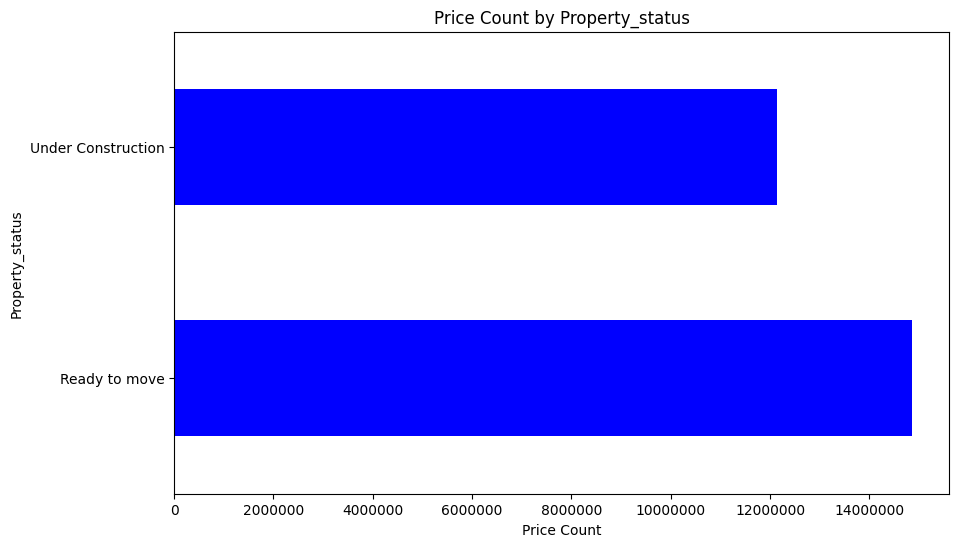

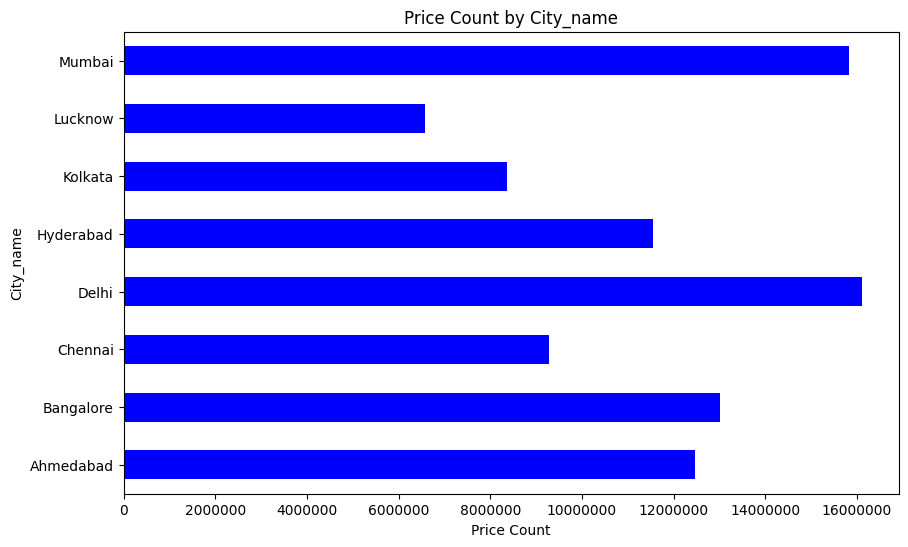

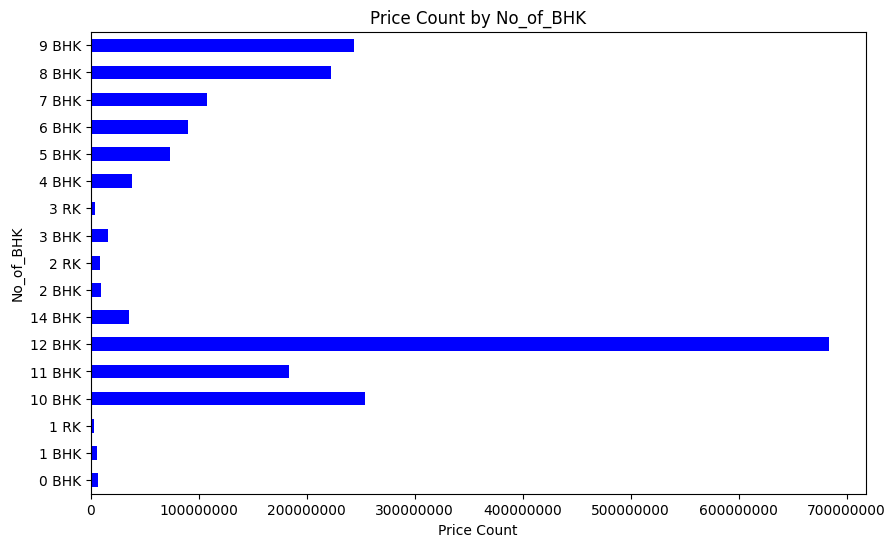

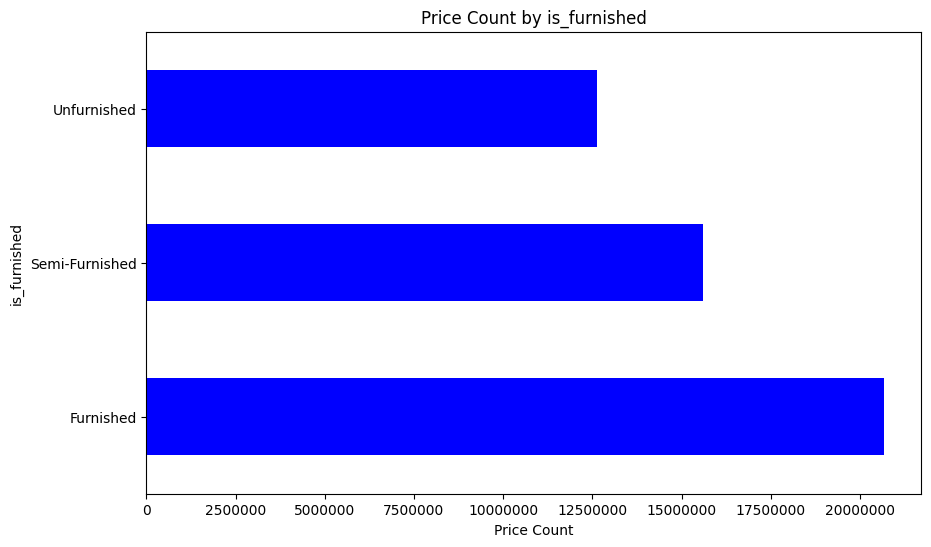

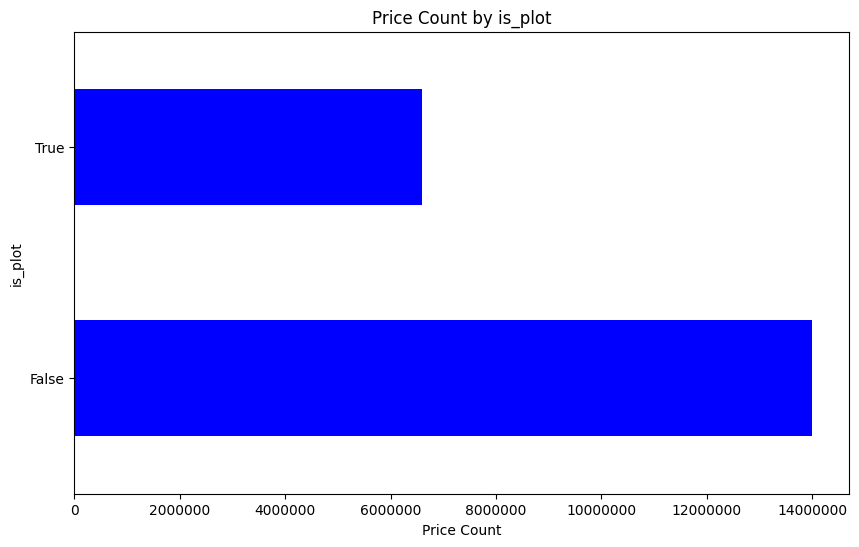

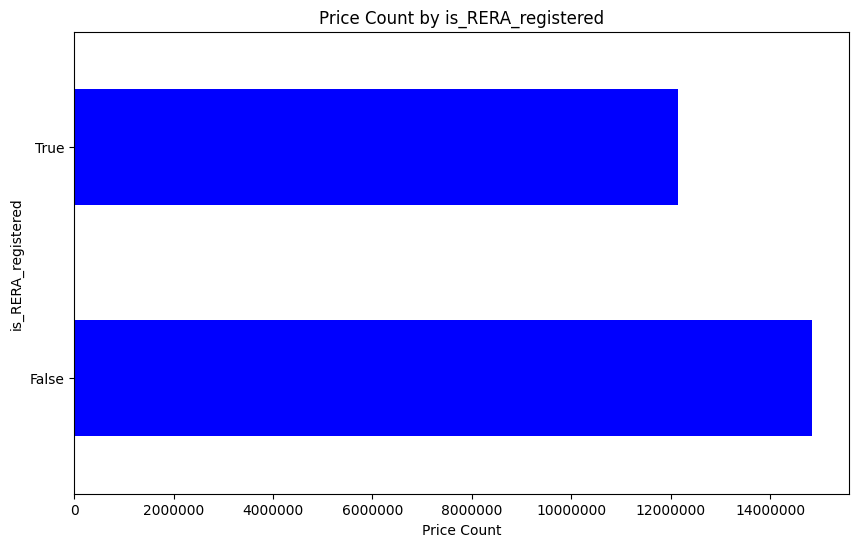

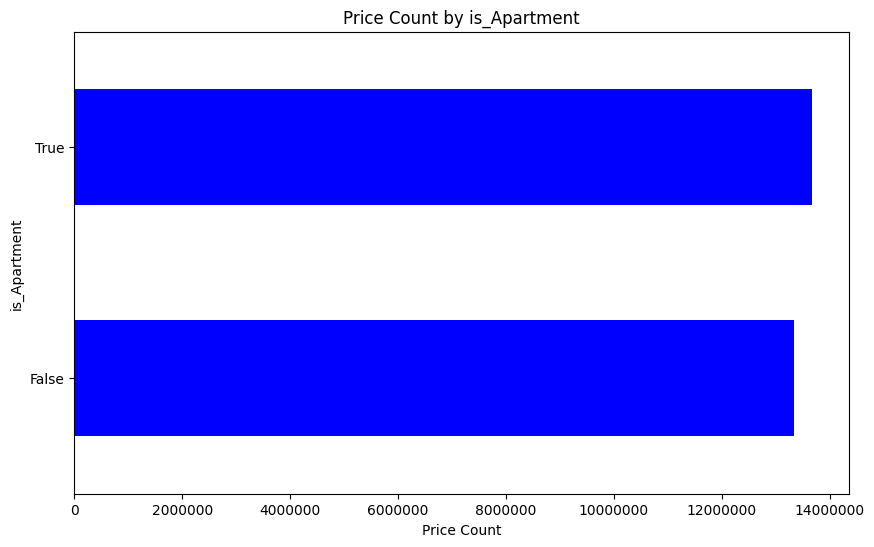

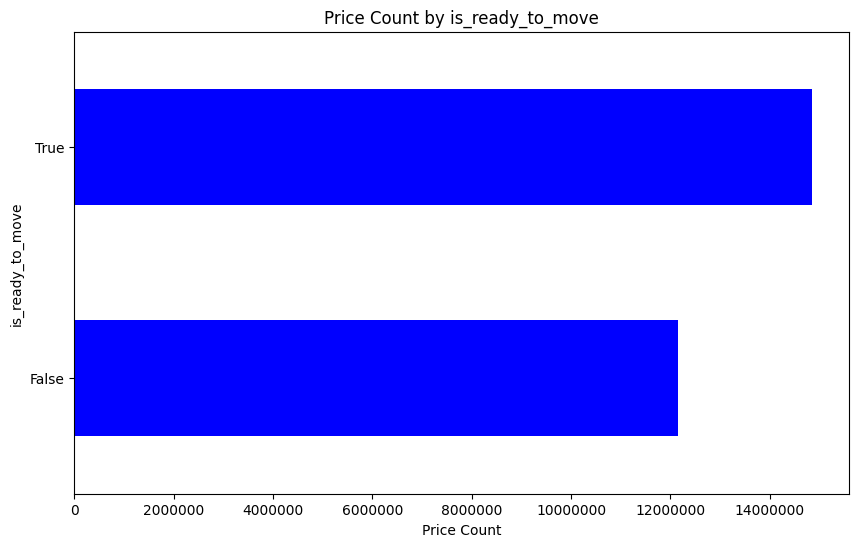

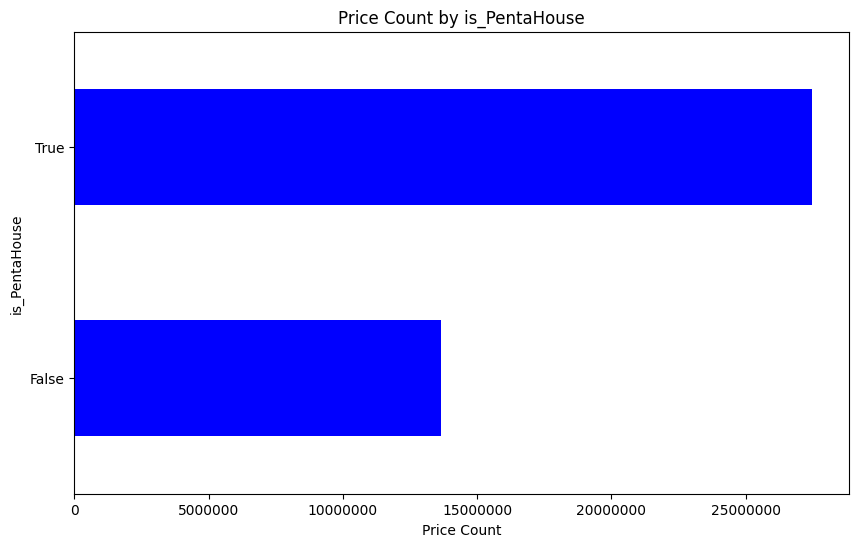

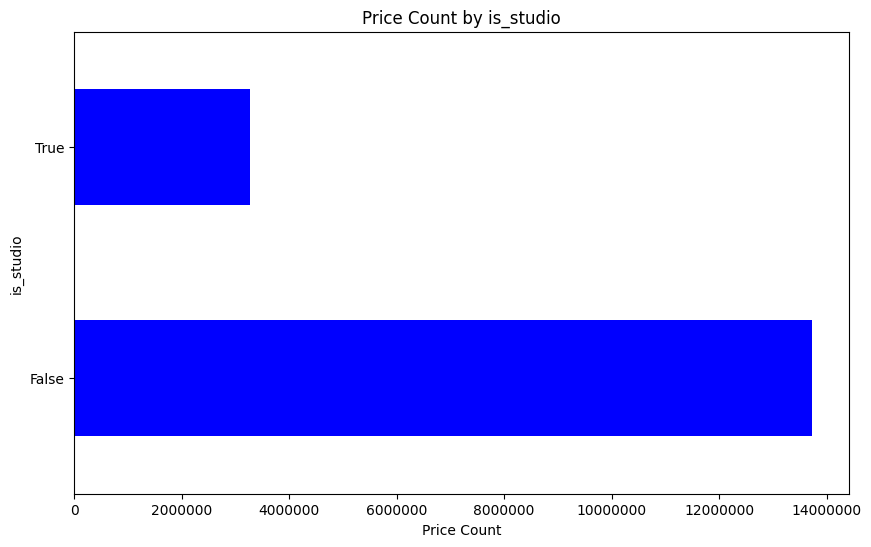

In [16]:
column_to_Visualize = [
    'Property_type', 'Property_status','City_name',
    'No_of_BHK', 'is_furnished', 'is_plot', 'is_RERA_registered', 'is_Apartment',
    'is_ready_to_move', 'is_PentaHouse', 'is_studio']


for i in column_to_Visualize:
    plt.figure(figsize=(10, 6))
    ax = df.groupby(i)['Price'].mean().plot(kind='barh', color='blue')
    plt.title(f'Price Count by {i}')
    plt.ylabel(i)
    plt.xlabel('Price Count')
    ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))  # Format y-axis labels as integers
    plt.show()

## Mapping Values


In [17]:
df['Property_type'].value_counts()

Apartment            130985
Residential Plot       6820
Villa                  3351
Independent Floor      1671
Independent House       881
Name: Property_type, dtype: int64

In [18]:
property_type_mapping = {
    'Apartment': 0,
    'Residential Plot': 1,
    'Villa': 2,
    'Independent Floor': 3,
    'Independent House': 4
}

df['Property_type'] = df['Property_type'].replace(property_type_mapping)

In [19]:
df['Property_status'].value_counts()

Ready to move         79632
Under Construction    64076
Name: Property_status, dtype: int64

In [20]:
Property_status_mapping = {
    'Under Construction': 0,
    'Ready to move': 1
}

df['Property_status'] = df['Property_status'].replace(Property_status_mapping)

In [21]:
df['Property_building_status'].value_counts()

ACTIVE        143538
INACTIVE         124
UNVERIFIED        46
Name: Property_building_status, dtype: int64

In [22]:
Property_building_status_mapping = {
    'UNVERIFIED': 0,
    'ACTIVE': 1,
    'INACTIVE': 2
}

df['Property_building_status'] = df['Property_building_status'].replace(Property_building_status_mapping)

In [23]:
df['is_furnished'].value_counts()

Unfurnished       104422
Semi-Furnished     33012
Furnished           6274
Name: is_furnished, dtype: int64

In [24]:
is_furnished_mapping = {
    'Unfurnished': 0,
    'Semi-Furnished': 1,
    'Furnished': 2
}

df['is_furnished'] = df['is_furnished'].replace(is_furnished_mapping)

In [25]:
df['is_plot'].value_counts()

False    136888
True       6820
Name: is_plot, dtype: int64

In [26]:
is_plot_mapping = {
    False: 0,
    True: 1
}

df['is_plot'] = df['is_plot'].replace(is_plot_mapping)

In [27]:
df['is_RERA_registered'].value_counts()

False    79750
True     63958
Name: is_RERA_registered, dtype: int64

In [28]:
is_RERA_registered_mapping = {
    False: 0,
    True: 1
}

df['is_RERA_registered'] = df['is_RERA_registered'].replace(is_RERA_registered_mapping)

In [29]:
df['is_Apartment'].value_counts()

True     130985
False     12723
Name: is_Apartment, dtype: int64

In [30]:
is_Apartment_mapping = {
    False: 0,
    True: 1
}

df['is_Apartment'] = df['is_Apartment'].replace(is_Apartment_mapping)

In [31]:
df[ 'is_ready_to_move'].value_counts()

True     79632
False    64076
Name: is_ready_to_move, dtype: int64

In [32]:
is_ready_to_move_mapping = {
    False: 0,
    True: 1
}

df['is_ready_to_move'] = df['is_ready_to_move'].replace(is_ready_to_move_mapping)

In [33]:
df['is_PentaHouse'].value_counts()

False    143695
True         13
Name: is_PentaHouse, dtype: int64

In [34]:
is_PentaHouse_mapping = {
    False: 0,
    True: 1
}

df['is_PentaHouse'] = df['is_PentaHouse'].replace(is_PentaHouse_mapping)

In [35]:
df['is_studio'].value_counts()

False    142530
True       1178
Name: is_studio, dtype: int64

In [36]:
is_studio_mapping = {
    False: 0,
    True: 1
}

df['is_studio'] = df['is_studio'].replace(is_studio_mapping)

In [37]:
df['No_of_BHK'].value_counts()

2 BHK     54346
3 BHK     42832
1 BHK     27228
4 BHK      9728
0 BHK      6820
5 BHK      1283
1 RK       1175
6 BHK       205
7 BHK        34
8 BHK        27
10 BHK       13
9 BHK         7
11 BHK        3
12 BHK        3
3 RK          2
14 BHK        1
2 RK          1
Name: No_of_BHK, dtype: int64

In [38]:
No_of_BHK_mapping = {
    '0 BHK': 0,
    '1 BHK': 1,
    '2 BHK': 2,
    '3 BHK': 3,
    '4 BHK': 4,
    '5 BHK': 5,
    '6 BHK': 6,
    '7 BHK': 7,
    '8 BHK': 8,
    '9 BHK': 9,
    '10 BHK': 10,
    '11 BHK': 11,
    '12 BHK': 12,
    '14 BHK': 14,
    '1 RK': 15,
    '2 RK': 16,
    '3 RK': 17,

}

df['No_of_BHK'] = df['No_of_BHK'].replace(No_of_BHK_mapping)

In [39]:
df.head()

,Property_type,Property_status,Price_per_unit_area,builder_id,Builder_name,Property_building_status,City_id,City_name,No_of_BHK,Locality_ID,...,Sub_urban_ID,Sub_urban_name,is_furnished,listing_domain_score,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_PentaHouse,is_studio
0,0,0,4285.0,100563465.0,Arkiton life Space,1,1,Ahmedabad,3,51907,...,10229,Ahmedabad West,0,4.0,0,1,1,0,0,0
1,0,0,7000.0,100009433.0,Keshav Narayan Group,1,1,Ahmedabad,4,56407,...,10229,Ahmedabad West,0,4.0,0,1,1,0,0,0
2,0,1,5752.0,100207731.0,Vishwa Developers Ahmedabad,1,1,Ahmedabad,3,66627,...,10229,Ahmedabad West,0,4.0,0,0,1,1,0,0
3,0,1,2486.0,101303.0,Satyam Developers,1,1,Ahmedabad,2,51899,...,10228,Ahmedabad South,0,4.0,0,0,1,1,0,0
4,0,0,5324.0,1484209.0,Navkar Buildcon Ahmedabad,1,1,Ahmedabad,3,50368,...,10229,Ahmedabad West,0,4.0,0,1,1,0,0,0


In [40]:
df['Size'].head()

0    1750
1    3384
2    2295
3     918
4    1760
Name: Size, dtype: int64

In [41]:
print(df.columns.tolist())

['Property_type', 'Property_status', 'Price_per_unit_area', 'builder_id', 'Builder_name', 'Property_building_status', 'City_id', 'City_name', 'No_of_BHK', 'Locality_ID', 'Locality_Name', 'Longitude', 'Latitude', 'Price', 'Size', 'Sub_urban_ID', 'Sub_urban_name', 'is_furnished', 'listing_domain_score', 'is_plot', 'is_RERA_registered', 'is_Apartment', 'is_ready_to_move', 'is_PentaHouse', 'is_studio']


In [42]:
df.corr()

<ipython-input-42-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Property_type,Property_status,Price_per_unit_area,builder_id,Property_building_status,City_id,No_of_BHK,Locality_ID,Longitude,Latitude,...,Size,Sub_urban_ID,is_furnished,listing_domain_score,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_PentaHouse,is_studio
Property_type,1.000000,0.085010,-0.132978,0.093542,0.003587,-0.178147,-0.021016,0.165410,0.143619,0.019366,...,0.217225,0.117163,0.040613,-0.014647,0.334061,-0.085617,-0.870783,0.085010,-0.002581,-0.010755
Property_status,0.085010,1.000000,-0.047363,-0.158957,0.011715,-0.046074,0.014206,-0.030240,-0.080974,0.088563,...,0.100248,0.047996,0.311729,-0.034426,0.087893,-0.998339,-0.101219,1.000000,0.005588,0.019135
Price_per_unit_area,-0.132978,-0.047363,1.000000,-0.087776,-0.006248,0.364022,0.100831,-0.155669,-0.371819,0.080825,...,0.000345,-0.160726,0.071651,-0.013728,-0.194245,0.047828,0.191195,-0.047363,-0.001512,-0.017913
builder_id,0.093542,-0.158957,-0.087776,1.000000,-0.005413,-0.047430,-0.072285,0.128666,0.062428,-0.019665,...,0.015619,0.047538,-0.117652,-0.018925,0.188602,0.159555,-0.158265,-0.158957,-0.003283,-0.004617
Property_building_status,0.003587,0.011715,-0.006248,-0.005413,1.000000,-0.005000,0.001735,-0.005227,0.006884,-0.007060,...,-0.000626,0.003668,-0.001369,0.026691,-0.000668,-0.012505,-0.002204,0.011715,-0.000150,0.003053
City_id,-0.178147,-0.046074,0.364022,-0.047430,-0.005000,1.000000,-0.088716,-0.127410,-0.259174,0.386390,...,-0.305280,-0.462245,0.039157,-0.019672,-0.167330,0.045658,0.218433,-0.046074,-0.008640,0.051386
No_of_BHK,-0.021016,0.014206,0.100831,-0.072285,0.001735,-0.088716,1.000000,-0.041793,0.062560,0.074881,...,0.264448,0.036120,0.054773,0.008385,-0.331758,-0.013969,0.165525,0.014206,0.008637,0.749445
Locality_ID,0.165410,-0.030240,-0.155669,0.128666,-0.005227,-0.127410,-0.041793,1.000000,0.153245,0.040325,...,0.039503,0.149830,-0.045955,-0.004276,0.169833,0.030133,-0.201244,-0.030240,-0.001806,-0.016007
Longitude,0.143619,-0.080974,-0.371819,0.062428,0.006884,-0.259174,0.062560,0.153245,1.000000,-0.005585,...,0.136833,0.116566,-0.161835,0.047084,0.155355,0.080001,-0.183997,-0.080974,-0.002564,-0.049297
Latitude,0.019366,0.088563,0.080825,-0.019665,-0.007060,0.386390,0.074881,0.040325,-0.005585,1.000000,...,-0.061987,-0.149297,0.224957,-0.005812,-0.193929,-0.088834,0.100170,0.088563,0.002721,0.009787


<ipython-input-43-7d71313119bc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


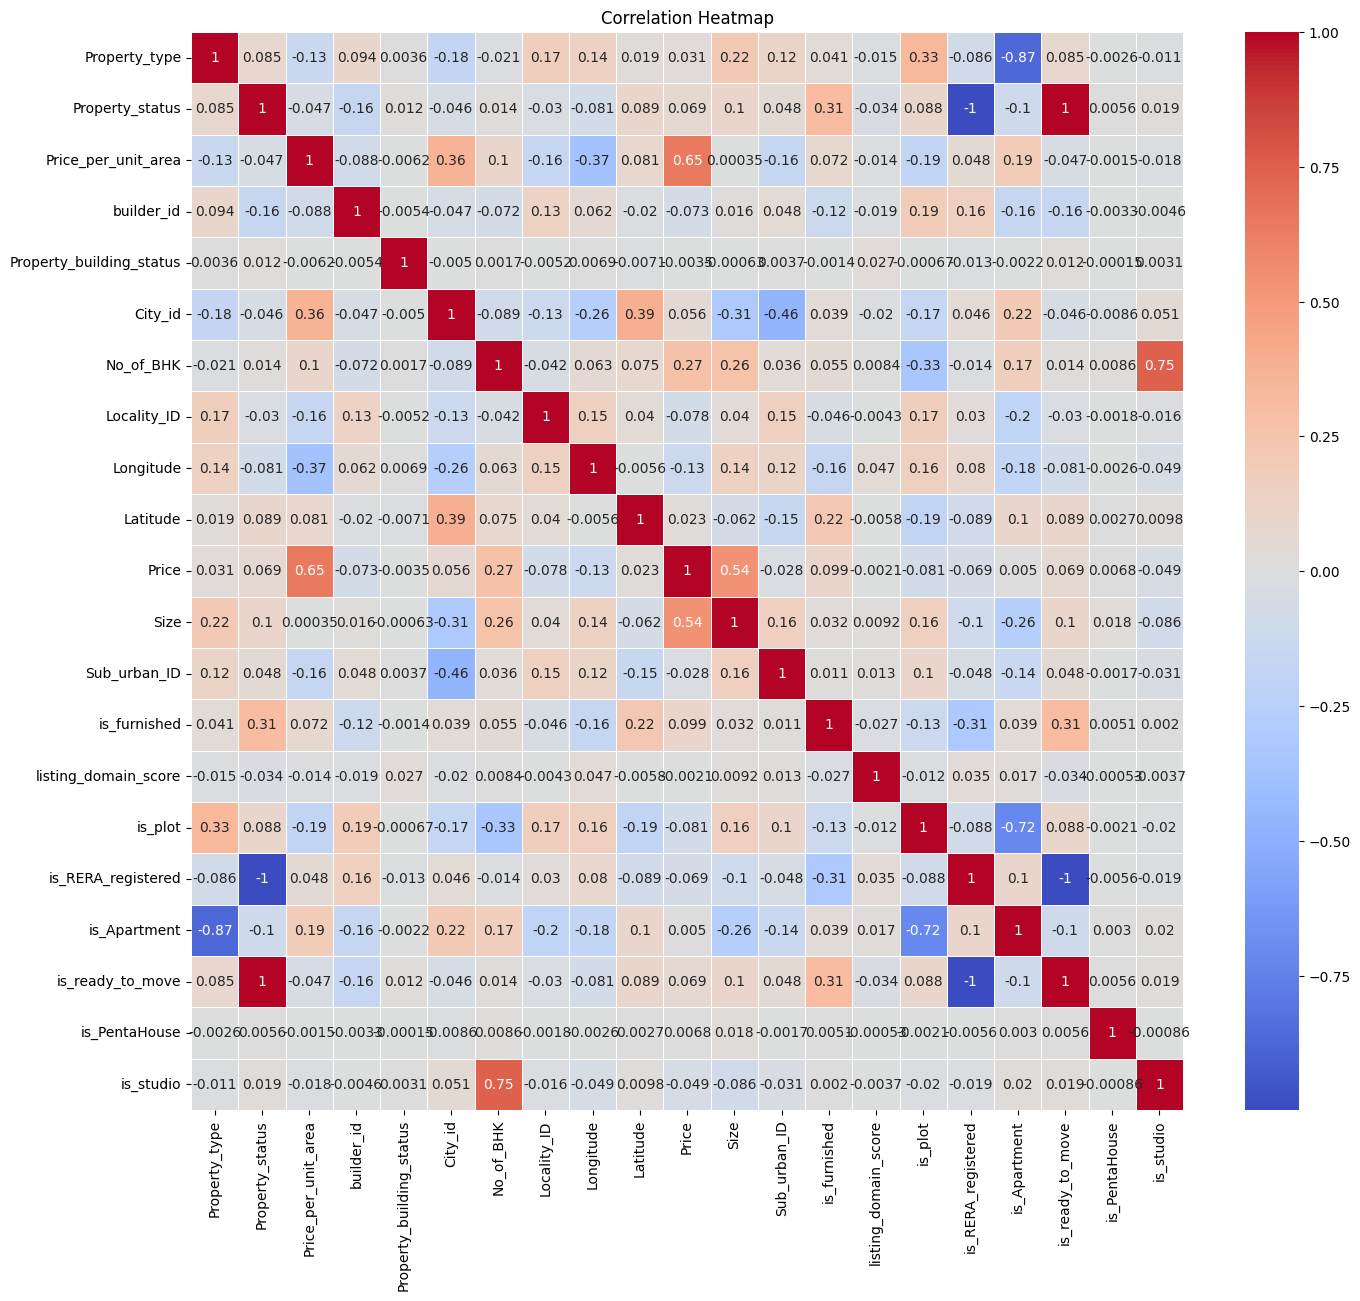

In [43]:
correlation_matrix = df.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

<ipython-input-44-a568b0a7b9ba>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()['Price']


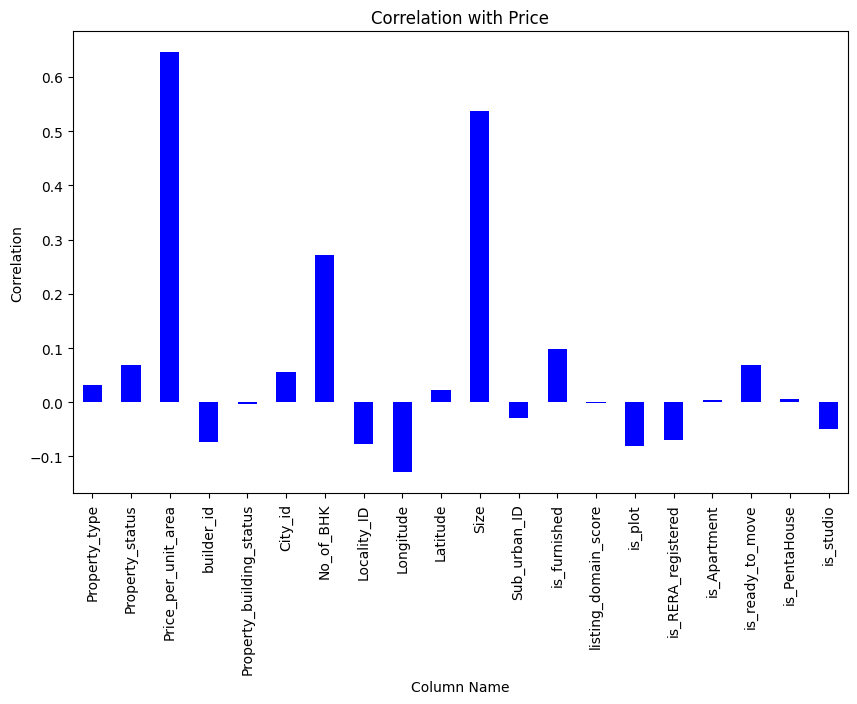

In [44]:
 correlations = df.corr()['Price']

# Create a bar graph
plt.figure(figsize=(10, 6))
correlations.drop('Price').plot(kind='bar', color='blue')
plt.title('Correlation with Price')
plt.xlabel('Column Name')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.show()

In [45]:
correlations.sort_values()

Longitude                  -0.129246
is_plot                    -0.081219
Locality_ID                -0.077511
builder_id                 -0.073497
is_RERA_registered         -0.069138
is_studio                  -0.048593
Sub_urban_ID               -0.028352
Property_building_status   -0.003459
listing_domain_score       -0.002131
is_Apartment                0.004989
is_PentaHouse               0.006779
Latitude                    0.022961
Property_type               0.031104
City_id                     0.056123
is_ready_to_move            0.069425
Property_status             0.069425
is_furnished                0.098976
No_of_BHK                   0.270937
Size                        0.537881
Price_per_unit_area         0.645274
Price                       1.000000
Name: Price, dtype: float64

## Spliting and  training dataset

In [46]:
X = df.drop(columns=['Price','Builder_name','City_name','Locality_Name','Sub_urban_name'])
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor()
}

In [48]:
df.dtypes

Property_type                 int64
Property_status               int64
Price_per_unit_area         float64
builder_id                  float64
Builder_name                 object
Property_building_status      int64
City_id                       int64
City_name                    object
No_of_BHK                     int64
Locality_ID                   int64
Locality_Name                object
Longitude                   float64
Latitude                    float64
Price                       float64
Size                          int64
Sub_urban_ID                  int64
Sub_urban_name               object
is_furnished                  int64
listing_domain_score        float64
is_plot                       int64
is_RERA_registered            int64
is_Apartment                  int64
is_ready_to_move              int64
is_PentaHouse                 int64
is_studio                     int64
dtype: object

In [49]:
results = []

In [ ]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print()

    results.append({
        "Model": model_name,
        "Mean Absolute Error": mae,
        "Mean Squared Error": mse,
        "R-squared": r2
    })

Model: Linear Regression
Mean Absolute Error: 4497985.95724051
Mean Squared Error: 108954904351002.86
R-squared: 0.718822841527622

Model: Decision Tree
Mean Absolute Error: 207443.85634857227
Mean Squared Error: 6287728226266.825
R-squared: 0.983773419228448

Model: Random Forest
Mean Absolute Error: 131221.9538390387
Mean Squared Error: 9605465033934.86
R-squared: 0.9752114199894415

Model: XGBoost
Mean Absolute Error: 416525.36721739965
Mean Squared Error: 18712633264889.26
R-squared: 0.9517087819011166



# Result

---



Model: Linear Regression

Mean Absolute Error: 4497985.95724051

Mean Squared Error: 108954904351002.86

R-squared: 0.718822841527622


---


Model: Decision Tree

Mean Absolute Error: 204511.68371606106

Mean Squared Error: 6028801144871.48

R-squared: 0.9844416257808005


---


Model: Random Forest

Mean Absolute Error: 136704.99382662267

Mean Squared Error: 11560641025099.332

R-squared: 0.9701657468939193


---


Model: XGBoost

Mean Absolute Error: 416525.36721739965

Mean Squared Error: 18712633264889.26

R-squared: 0.9517087819011166


---


Model: SVR

Mean Absolute Error: 8374648.226717024

Mean Squared Error: 412669957211482.0

R-squared: -0.06496689292513058


---




Model: KNN

Mean Absolute Error: 1229796.3902929511

Mean Squared Error: 32922449656039.785

R-squared: 0.9150378691131403

In [ ]:
results_df = pd.DataFrame(results)

In [ ]:
results_df

In [ ]:
results_df.dtypes

In [ ]:
model_names = results_df['Model']
metrics = ['Mean Absolute Error', 'Mean Squared Error', 'R-squared']

fig, axs = plt.subplots(3, 1, figsize=(6, 8))

for i, metric in enumerate(metrics):
    axs[i].barh(model_names, results_df[metric], color='skyblue')
    axs[i].set(xlabel=metric, ylabel='Model', title=f'{metric} by Model')
    axs[i].invert_yaxis()

plt.tight_layout()
plt.show()

In [ ]:
results_df['Index'] = range(1, len(results_df) + 1)

In [57]:
best_model = None
best_score = float('inf')

for i in results_df['Index']:
    row = results_df.loc[i - 1]  # Subtract 1 to account for 0-based indexing
    if row['Mean Absolute Error'] < best_score:
        best_score = row['Mean Absolute Error']
        best_model = row['Model']


print(f"The best model is: {best_model} with MAE: {best_score}")

The best model is: Random Forest with MAE: 131221.9538390387


## Conclusion



*   Constructed property Price Prediction system using machine learning models, it is evident that Decision Tree and Random Forest models excel with the lowest Mean Absolute Error (MAE) and Mean Squared Error (MSE) values.

* They also achieve high R-squared (R2) values, indicating strong predictive performance and a substantial explanation of data variance.

* The XGBoost model closely follows, maintaining competitive accuracy and explanatory power.

* Linear Regression and K-Nearest Neighbors (KNN) models offer moderate performance, with reasonable accuracy and predictive capability.

* However, the Support Vector Regression (SVR) model underperforms in this context, exhibiting the highest MAE and MSE values and a negative R-squared.

